In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

import time

In [92]:
path_data = '/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv'
df =  pd.read_csv(path_data)

In [93]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Analyse

In [94]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [95]:
summary(df)

data shape: (145460, 23)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Date,object,0,0.000000,3436,NaN,NaN,2008-12-01,2008-12-02,2008-12-03
Location,object,0,0.000000,49,NaN,NaN,Albury,Albury,Albury
MinTemp,float64,1485,1.020899,389,-8.5,33.9,13.4,7.4,12.9
MaxTemp,float64,1261,0.866905,505,-4.8,48.1,22.9,25.1,25.7
Rainfall,float64,3261,2.241853,681,0.0,371.0,0.6,0.0,0.0
Evaporation,float64,62790,43.166506,358,0.0,145.0,NaN,NaN,NaN
Sunshine,float64,69835,48.009762,145,0.0,14.5,NaN,NaN,NaN
WindGustDir,object,10326,7.098859,16,NaN,NaN,W,WNW,WSW
WindGustSpeed,float64,10263,7.055548,67,6.0,135.0,44.0,44.0,46.0
WindDir9am,object,10566,7.263853,16,NaN,NaN,W,NNW,W


In [96]:
df['Date'] = pd.to_datetime(df['Date'])

In [97]:
df_numeric = df.select_dtypes(include=['float64'])
df[df_numeric.columns] = df_numeric.interpolate(method='linear', limit_direction='both')

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [98]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

## ANOVA

For analysis, we will use one-factor analysis of variance (One—Way ANOVA), a statistical method used to compare the averages of two or more data groups to determine whether there are statistically significant differences between them. It evaluates how much variation in the data is explained by differences between groups compared to variation within groups. One-Way ANOVA is used to test the hypothesis of equality of averages between groups.

pvalue (>0,05)= The null hypothesis (H0) in ANOVA states that the mean values in all groups are equal.

pvalue (<0,05)= The alternative hypothesis (H1) asserts that at least one of the averages differs from the others.

In [99]:
from scipy import stats

def run_anova(df, column, target):
    groups = df[column].unique()
    group_data = [df[df[column] == group][target] for group in groups]
    anova_result = stats.f_oneway(*group_data)
    return anova_result

In [100]:
anova_result_location = run_anova(df, 'Location', 'RainToday')
print(f'ANOVA result for Location and RainToday:\n{anova_result_location}')

anova_result_pressure3pm = run_anova(df, 'Pressure3pm', 'RainTomorrow')
print(f'ANOVA result for Pressure3pm and RainTomorrow:\n{anova_result_pressure3pm}')

anova_result_windgustdir = run_anova(df, 'WindGustDir', 'RainToday')
print(f'ANOVA result for WindGustDir and RainToday:\n{anova_result_windgustdir}')

anova_result_winddir3pm = run_anova(df, 'WindDir3pm', 'RainTomorrow')
print(f'ANOVA result for WindDir3pm and RainTomorrow:\n{anova_result_winddir3pm}')

ANOVA result for Location and RainToday:
F_onewayResult(statistic=74.05285930267993, pvalue=0.0)
ANOVA result for Pressure3pm and RainTomorrow:
F_onewayResult(statistic=1.5398808052359039, pvalue=1.078842232225e-311)
ANOVA result for WindGustDir and RainToday:
F_onewayResult(statistic=186.87643785281958, pvalue=0.0)
ANOVA result for WindDir3pm and RainTomorrow:
F_onewayResult(statistic=81.07714655102879, pvalue=6.572134858277748e-249)


## Autocorrelation

Autocorrelation is a measure of the correlation between successive values in a time series. It shows how strongly the current value of the time series depends on previous values.

An autocorrelation value close to 1 indicates a strong positive correlation, that is, the current value is closely related to previous values and is moving in the same direction. A value close to -1 indicates a strong negative correlation, that is, the current value is moving in the opposite direction compared to previous values. A value near 0 means a slight correlation, that is, the current value is almost independent of previous values.

In [101]:
rain = df['RainTomorrow']
autocorr_values = rain.autocorr()
print("Autocorrelation:", autocorr_values)

Autocorrelation: 0.30565905941749916


Autocorrelation is approximately 0.305, which indicates a weak positive correlation between the current RainTomorrow value and previous values.

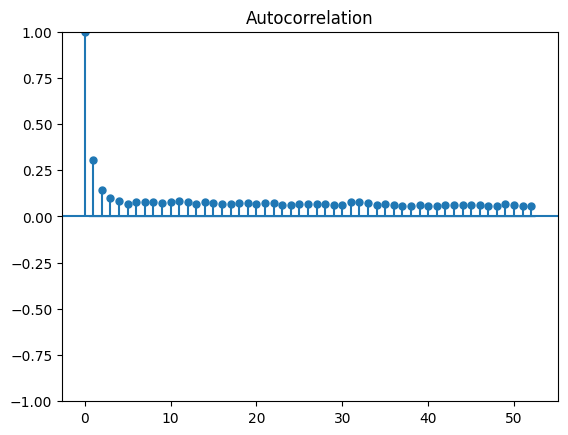

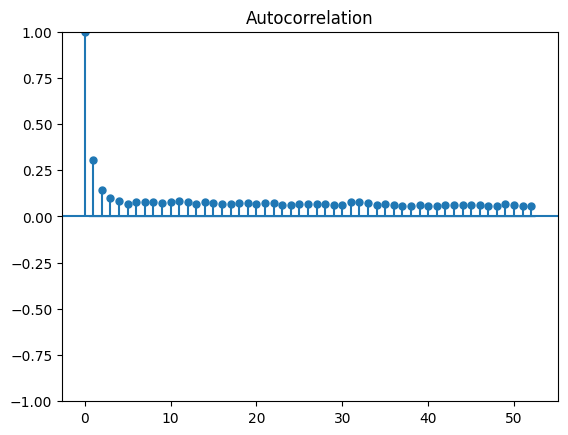

In [102]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['RainTomorrow'])

# Preprocessing

In [103]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoding_methods = {
    'WindGustDir': 'label',
    'WindDir9am': 'label',
    'WindDir3pm': 'label',
    'Location': 'one-hot',
}

for column, method in encoding_methods.items():
    if method == 'label':
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
    elif method == 'one-hot':
        one_hot_encoder = OneHotEncoder(sparse = False, drop = 'first')
        encoded = one_hot_encoder.fit_transform(df[[column]])
        column_names = [f'{column}_{category}' for category in one_hot_encoder.categories_[0][1:]]
        df_encoded = pd.DataFrame(encoded, columns=column_names)
        df = pd.concat([df, df_encoded], axis = 1)
        df.drop(columns = [column], inplace = True)

In [104]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,2008-12-01,13.4,22.9,0.6,12.0,12.3,13,44.0,13,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-12-02,7.4,25.1,0.0,12.0,12.3,14,44.0,6,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-12-03,12.9,25.7,0.0,12.0,12.3,15,46.0,13,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-12-04,9.2,28.0,0.0,12.0,12.3,4,24.0,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-12-05,17.5,32.3,1.0,12.0,12.3,13,41.0,1,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Converting time series data to stationary data is an important step when working with the ARIMA model. Stationary time series data are characterized by a constant mean and variance over time, as well as the absence of systematic changes over time. The ARIMA model requires that the data be stationary or can be converted to stationary data. Let's apply differentiation.

In [105]:
df['RainTomorrow diff'] = df['RainTomorrow'].diff()
df.dropna(inplace=True)

## Dickey-Fuller Test

In [106]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['RainTomorrow diff'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('Dickey-Fuller Test:')
print('ADF statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if p_value < 0.05:
    print('p-value is less than the significance level (0.05). The time series is stationary.')
else:
    print('p-value is greater than or equal to the significance level (0.05). The time series is non-stationary.')

Dickey-Fuller Test:
ADF statistic: -65.45136671597744
p-value: 0.0
Critical Values:
   1%: -3.4303949806061524
   5%: -2.8615598807915985
   10%: -2.566780581837776
p-value is less than the significance level (0.05). The time series is stationary.


**Interpretation of Dickey-Fuller Test Results**

* p-value: In this case, the p-value is 0.0, which is significantly less than the significance level of 0.05. This means we reject the null hypothesis of the presence of a unit root.
* ADF statistic: The ADF statistic value of -65.45131972155525 is lower than all critical values. This also indicates that the time series is stationary.

Since the p-value is less than the significance level of 0.05 and the ADF statistic value is lower than the critical values for all significance levels, we can conclude that the time series is stationary. This means that its statistical properties (such as mean and variance) do not change over time, which is important for applying many time series models, such as ARIMA.

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is another statistical test used to assess the stationarity of a time series. It is complementary to the Augmented Dickey-Fuller (ADF) test.

The KPSS test evaluates the null hypothesis that the time series is stationary against the alternative hypothesis of non-stationarity. Unlike the ADF test, which assumes the presence of a unit root, the KPSS test assumes the absence of a unit root.

The test calculates the KPSS statistic, which measures the cumulative sum of squared deviations from the mean in the series. It also provides a p-value that indicates the probability of observing the KPSS statistic or a more extreme value under the null hypothesis.

Interpreting the results of the KPSS test involves considering the KPSS statistic and the associated p-value. If the KPSS statistic is greater than the critical value at a chosen significance level (e.g., 0.05), it provides evidence against the null hypothesis of stationarity. Conversely, if the KPSS statistic is smaller than the critical value, it suggests that the time series is stationary.

In [107]:
from statsmodels.tsa.stattools import kpss

data = df['RainTomorrow']
kpss_stat, p_value, lags, critical_values = kpss(data)

print(f'KPSS statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if p_value < 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

KPSS statistic: 0.49852698958287883
p-value: 0.041998425769621886
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The time series is not stationary.


* KPSS statistic: The KPSS statistic value is 0.4985530774092076.
* p-value: The p-value is 0.04199255013306135, which is less than the significance level of 0.05. This suggests that we reject the null hypothesis of stationarity.

Since the p-value is less than the significance level of 0.05 and the KPSS statistic (0.4985530774092076) is greater than the 5% critical value (0.463), we reject the null hypothesis that the time series is stationary. Therefore, the time series is not stationary.

# ARIMA (Autoregressive Integrated Moving Average)

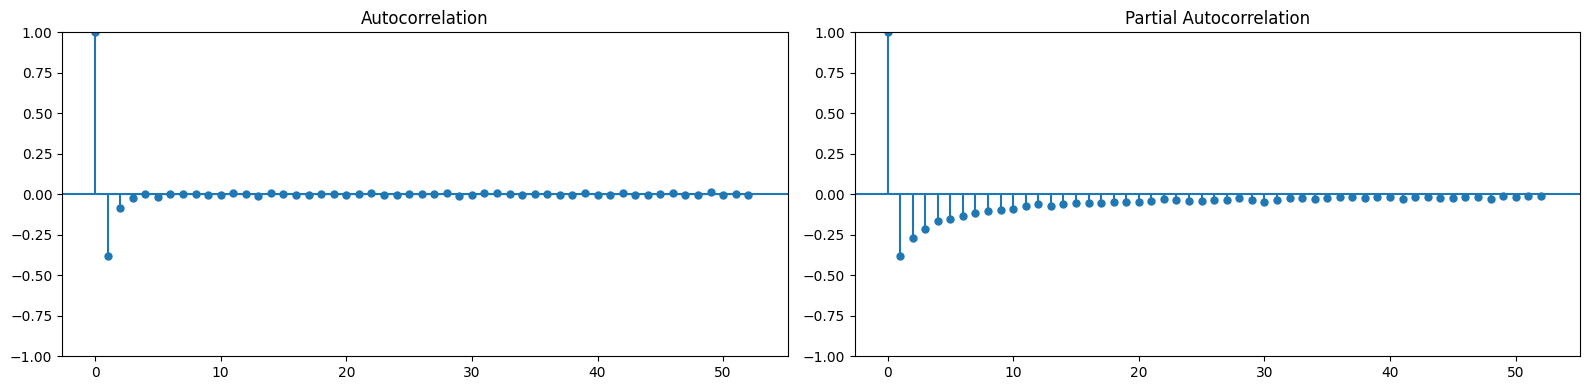

CPU times: user 17.7 s, sys: 4.97 s, total: 22.6 s
Wall time: 6.11 s


In [108]:
%%time

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf 

# Autocorrelation Function (ACF)
plt.figure(figsize=(16, 4))
ax1 = plt.subplot(121)
plot_acf(df['RainTomorrow diff'], ax=ax1)

#Autocorrelation Function (PACF)
ax2 = plt.subplot(122)
plot_pacf(df['RainTomorrow diff'], ax=ax2)

plt.tight_layout()
plt.show()

In [109]:
#!pip install pmdarima

In [110]:
#from pmdarima import auto_arima
#import matplotlib.pyplot as plt
#model = auto_arima(df['RainTomorrow diff'], seasonal=False, trace=True)
#results = model.fit()
#print(results.summary())

In [111]:
train_size = int(len(df) * 0.8)  # 80%
train_df = df[:train_size]
test_df = df[train_size:]

In [112]:
p = 1
d = 0 
q = 2

In [113]:
%%time

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(train_df['RainTomorrow diff'], order=(1, 0, 2))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:      RainTomorrow diff   No. Observations:               116367
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -57004.584
Date:                Fri, 14 Jun 2024   AIC                         114019.168
Time:                        18:00:05   BIC                         114067.491
Sample:                             0   HQIC                        114033.734
                             - 116367                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.407e-06   8.19e-05     -0.042      0.967      -0.000       0.000
ar.L1          0.2869      0.011     26.401      0.000       0.266       0.308
ma.L1         -1.0171      0.011    -90.362      0.0

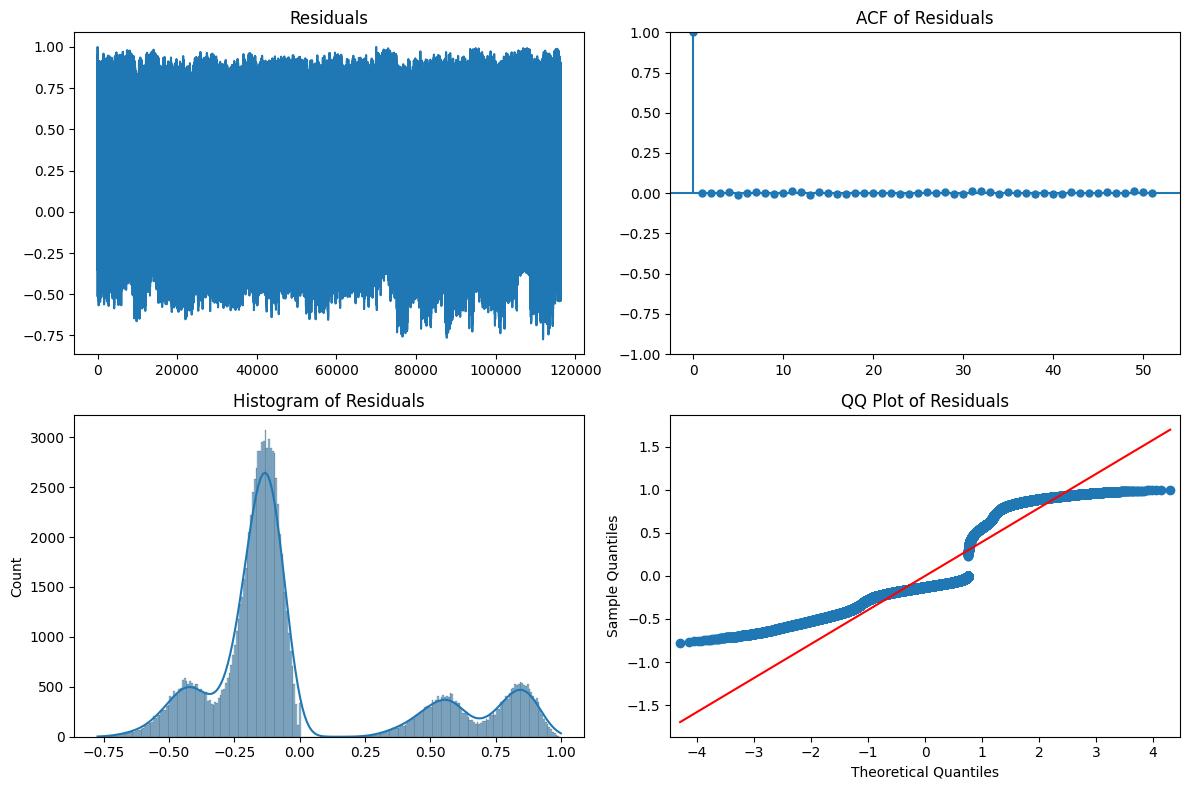

In [114]:
residuals = results.resid
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 2, 2)
sm.graphics.tsa.plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

plt.subplot(2, 2, 4)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()

In [115]:
predictions = results.predict(start=len(train_df), end=len(df)-1, dynamic=False)

actual_values = test_df['RainTomorrow diff']

mae = np.mean(np.abs(predictions - actual_values))
mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.21175251270031578
Mean Squared Error (MSE): 0.21174934217052374
Root Mean Squared Error (RMSE): 0.46016229981444995


The closer MAE, MSE, and RMSE are to zero, the better the model predicts the target variable. In this case, the values of MAE and MSE are sufficiently low, indicating that the model forecasts the target variable RainTomorrow diff fairly accurately.